<a href="https://colab.research.google.com/github/ReAlex1902/ML/blob/master/sem7/sem7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH = '/content/gdrive/Shared drives/DigitalHome I UnlimitedDisc 3/Alex/datasets/ML/sem7/2017.csv'
data = pd.read_csv(PATH)
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
data.shape

(155, 12)

In [5]:
data.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [6]:
data['Country'].nunique()

155

In [7]:
data = data.drop('Country', axis = 1)
data.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


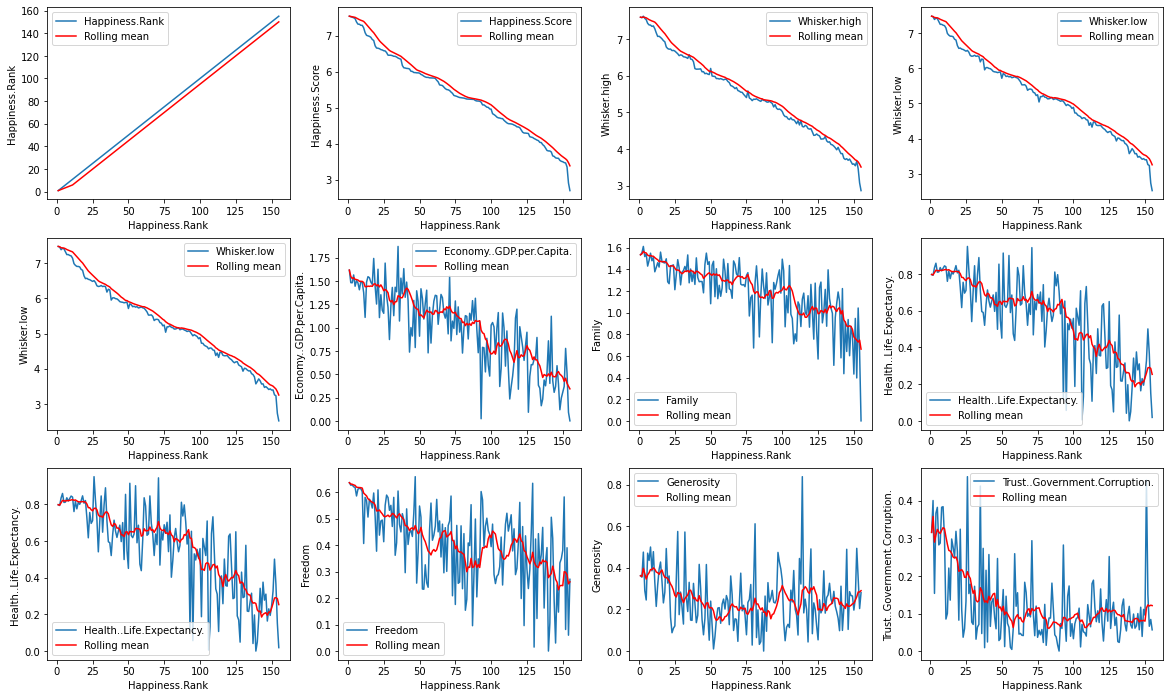

In [37]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize = (20, 12))

i = 0
j = 0
while i < rows:
    axes[i, j].plot(data['Happiness.Rank'], data.iloc[:, i*rows + j], label = data.iloc[:, i*rows + j].name)

    y = data.iloc[:, i*rows + j].rolling(window = 11, min_periods = 1).mean()   ## rolling
    # ax = axes[i, j].twinx()
    axes[i, j].plot(data['Happiness.Rank'], y, c = 'r', label = 'Rolling mean')

    axes[i, j].set_xlabel('Happiness.Rank')
    axes[i, j].set_ylabel(data.columns[i*rows + j])
    axes[i, j].legend()

    if i*rows + j == data.shape[1]:
        break

    j += 1
    if j == cols:
        i += 1
        j = 0

Наблюдаются прогнозируемые тенденции: чем ниже ранк, тем ниже показатель. 

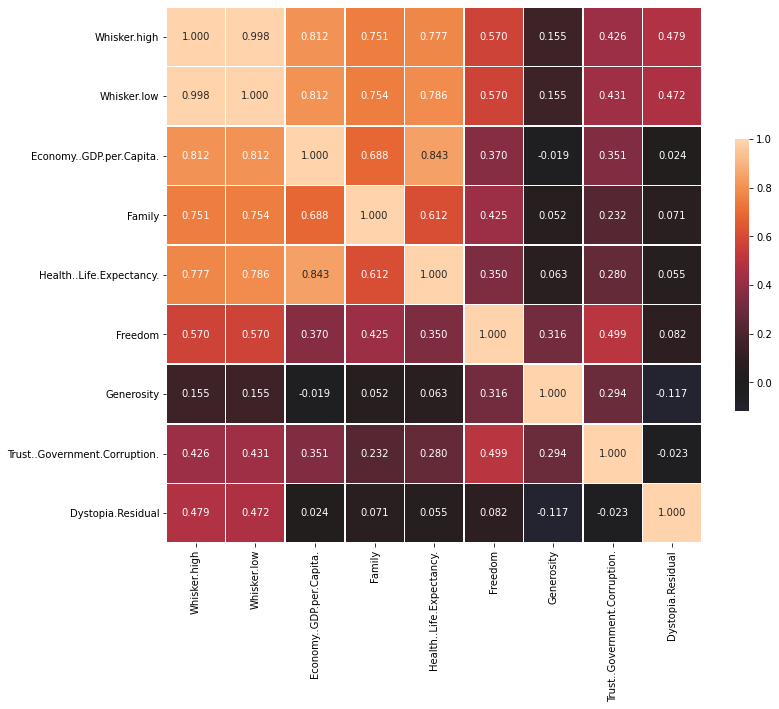

In [8]:
corrs = data.drop(['Happiness.Score', 'Happiness.Rank'], axis = 1).corr()
mask = np.zeros_like(corrs, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True    

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corrs, mask = mask, vmax = 1, center = 0, annot = True, fmt = '.3f',
            square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5});

In [9]:
from sklearn.model_selection import train_test_split
y = data['Happiness.Score']
X = data.drop(['Happiness.Score', 'Happiness.Rank'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.32)

In [10]:
from sklearn.linear_model import RidgeCV
lm = RidgeCV([10, 1, 0.1, 0.01, 0.001], normalize = True)

In [11]:
lm.fit(X_train, y_train)

RidgeCV(alphas=array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [12]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, lm.predict(X_test), squared = False)

0.00044649539433720464

In [13]:
preds = pd.DataFrame({"actual": y_test,
             "pred": lm.predict(X_test)}).sort_values(by = "pred", ascending = False)
preds

,actual,pred
3,7.494,7.493783
4,7.469,7.468705
5,7.377,7.376232
9,7.284,7.283641
14,6.977,6.976648
15,6.951,6.950418
18,6.714,6.713739
20,6.648,6.647495
22,6.609,6.608493
25,6.572,6.572190


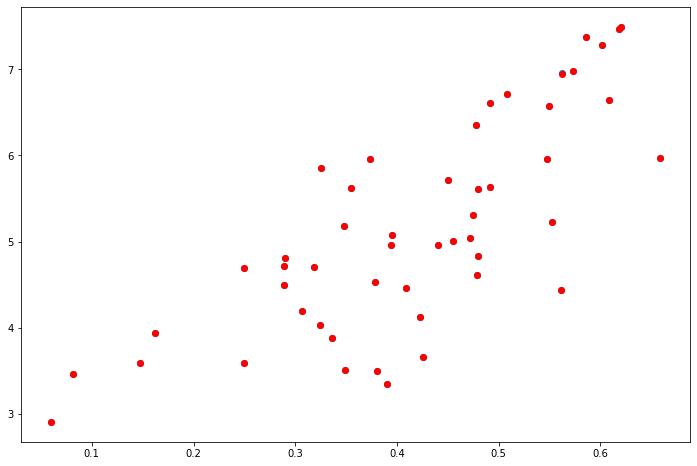

In [14]:
plt.figure(figsize = (12, 8))

plt.scatter(X_test['Freedom'], y_test)
plt.scatter(X_test['Freedom'], lm.predict(X_test), c = 'r');

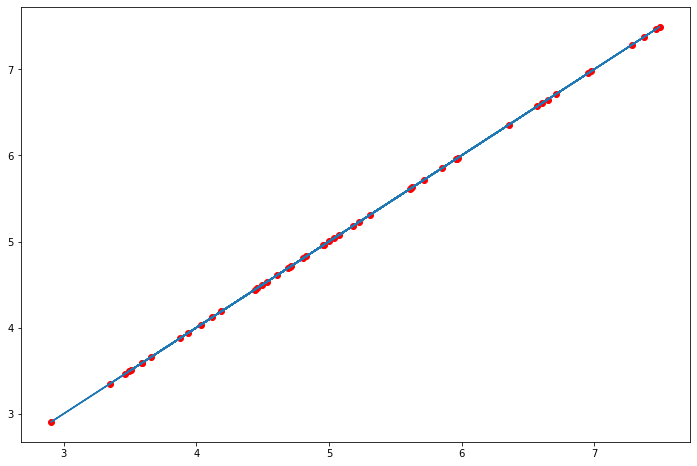

In [15]:
plt.figure(figsize = (12, 8))

plt.scatter(y_test, y_test, c = 'r')
plt.plot(y_test, lm.predict(X_test));

In [16]:
## Коэффициены важности

coefs = pd.DataFrame({"feature": X_train.columns,
             "coef": lm.coef_}).sort_values(by = "coef", ascending = False)
coefs

,feature,coef
4,Health..Life.Expectancy.,0.490793
7,Trust..Government.Corruption.,0.489609
3,Family,0.489178
5,Freedom,0.489059
8,Dystopia.Residual,0.488404
6,Generosity,0.488069
2,Economy..GDP.per.Capita.,0.487597
0,Whisker.high,0.257919
1,Whisker.low,0.253104


In [17]:
print ('R^2: {0}'.format(lm.score(X_test, y_test)))

R^2: 0.9999998648422763
